# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [4]:
data = pd.read_csv('Temp_States.csv')
temp = data.copy()

#### Print `temp`

In [5]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


In [8]:
temp.columns = [column.lower().replace(" ", "_") for column in temp.columns]

#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.dtypes

city            object
state           object
temperature    float64
dtype: object

City and State are strings and Temperature is a float.

#### Select the rows where state is New York

In [14]:
newyork = temp[temp["state"] == 'New York']

#### What is the average of the temperature of cities in New York?

In [17]:
avg_temp = newyork["temperature"].mean()
print(f" The average temperature of cities in New York is {avg_temp:.2f}")

 The average temperature of cities in New York is 10.74


#### We want to know cities and states with Temperature above 15 degress Celcius

In [33]:
above_15 = temp[temp["temperature"] > 15].reset_index(drop=True)
city_state_series = above_15.apply(lambda row: f"{row['city']}, {row['state']}", axis=1)
print(f"The cities and states with temperature above 15 degress Celcius are {city_state_series.to_string(index=False, name=False)}")

The cities and states with temperature above 15 degress Celcius are         NYC, New York
Hartford, Connecticut
   Treton, New Jersey
   Newark, New Jersey


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [ ]:
print(f"The cities with temperature above 15 degrees Celcius are {', '.join(map(str, above_15['city'].to_list()))}")

The cities with temperature above 15 degrees Celcius are NYC, Hartford, Treton, Newark


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [40]:
condition = ((temp["temperature"] > 15 )& (temp["temperature"] < 20 ))
above_15_below_20 = temp[condition].reset_index(drop=True)
above_15_below_20 

,city,state,temperature
0,NYC,New York,19.444444
1,Hartford,Connecticut,17.222222


In [44]:
city_series = above_15_below_20.apply(lambda row: f"{row['city']}, {row['state']}", axis=1)
print(f"The cities with temperature above 15 degrees Celcius but below 20 are {', '.join(map(str, above_15_below_20['city'].to_list()))}")

The cities with temperature above 15 degrees Celcius but below 20 are NYC, Hartford


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [46]:
temp.groupby("state")["temperature"].agg(['mean', 'std'])

,mean,std
state,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [49]:
data_employee = pd.read_csv('Employee.csv')
employee = data_employee.copy()
employee.columns = [column.lower().replace(" ", "_") for column in employee.columns]


#### Explore the data types of the Temp dataframe. Comment your results

In [50]:
employee.info() # There are mostly strings data types in the dataframe, only Years and Salary are integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        9 non-null      object
 1   department  9 non-null      object
 2   education   9 non-null      object
 3   gender      9 non-null      object
 4   title       9 non-null      object
 5   years       9 non-null      int64 
 6   salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 636.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [51]:
num = employee.select_dtypes(include="number")
cat = employee.select_dtypes(exclude="number")

In [60]:
cat_columns = [', '.join(map(str, cat.columns.to_list()))]
num_columns = [', '.join(map(str, num.columns.to_list()))]

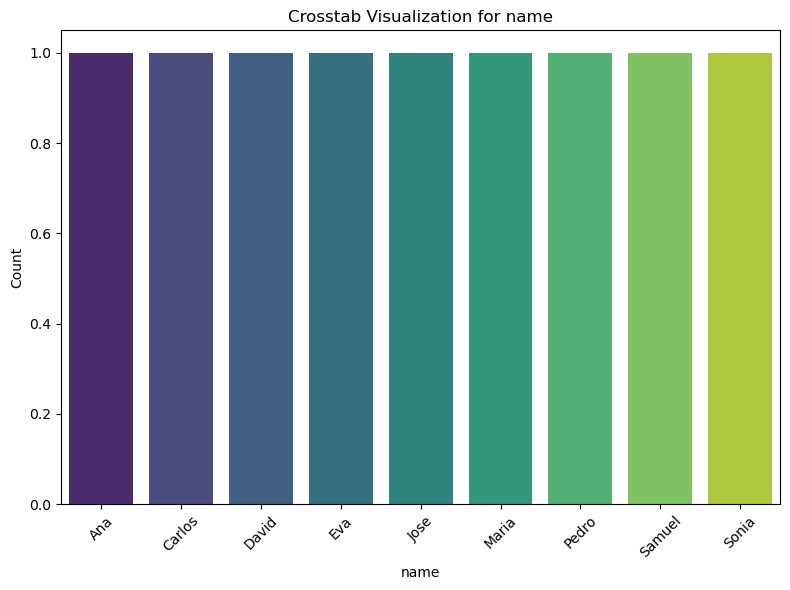

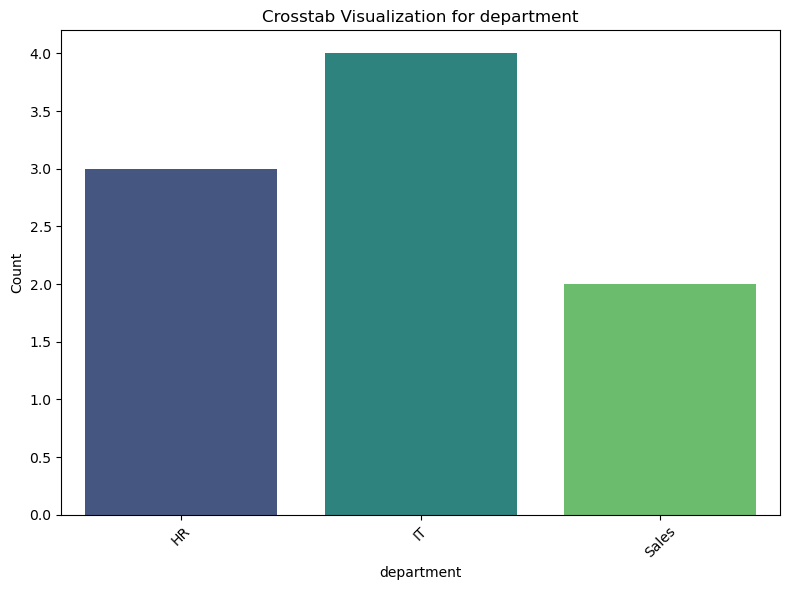

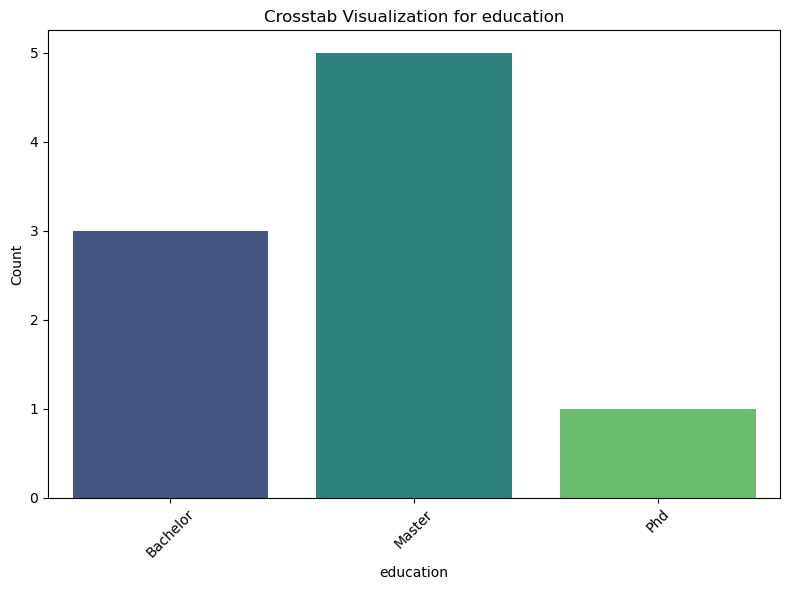

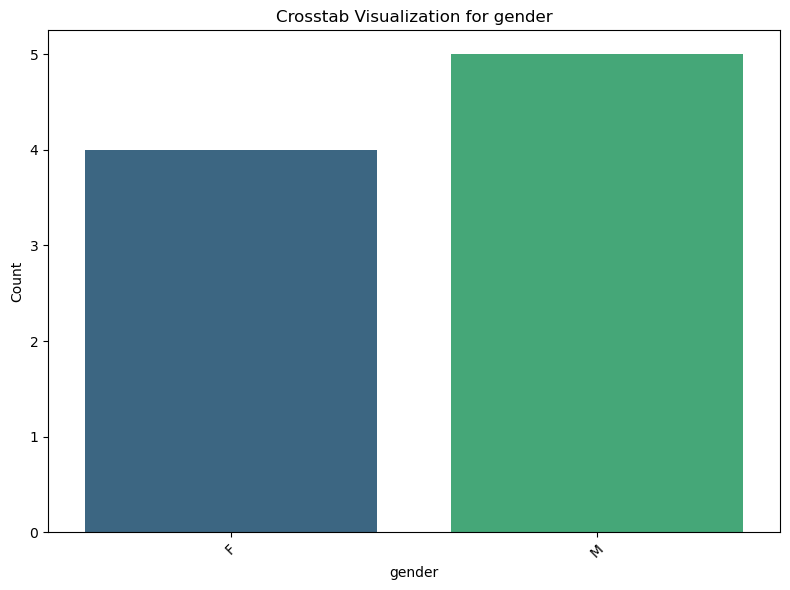

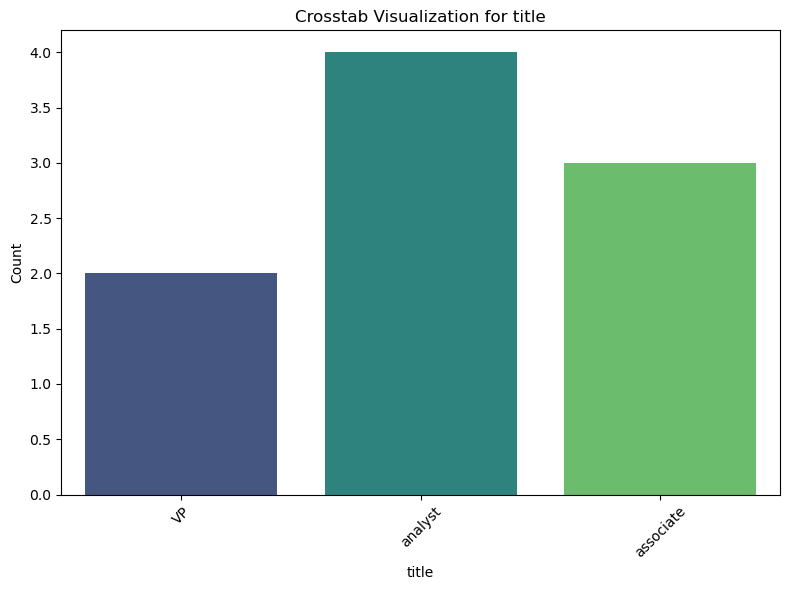

In [62]:
for column in cat.columns:
    # Create a crosstab for the current column
    result = pd.crosstab(index=cat[column], columns='count').reset_index()

    # Plot the crosstab result
    plt.figure(figsize=(8, 6))
    sns.barplot(x=column, y='count', data=result, palette='viridis')
    plt.title(f'Crosstab Visualization for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

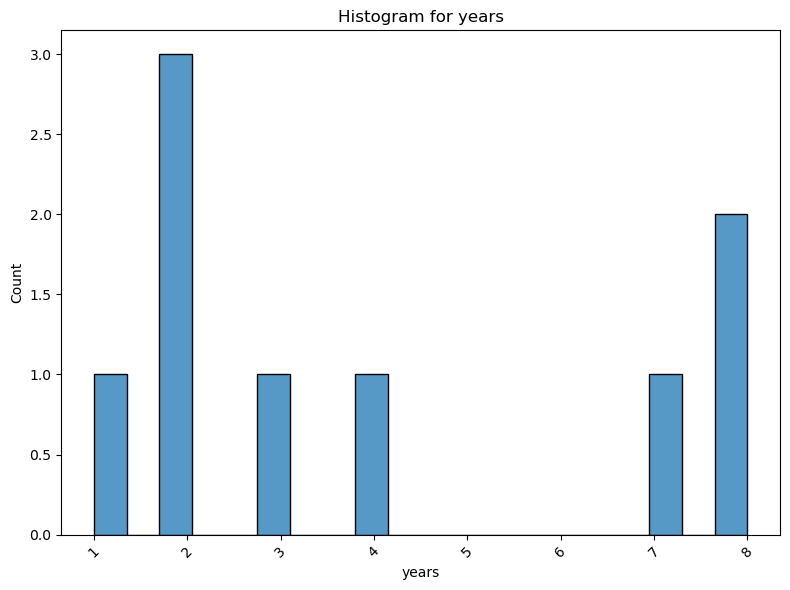

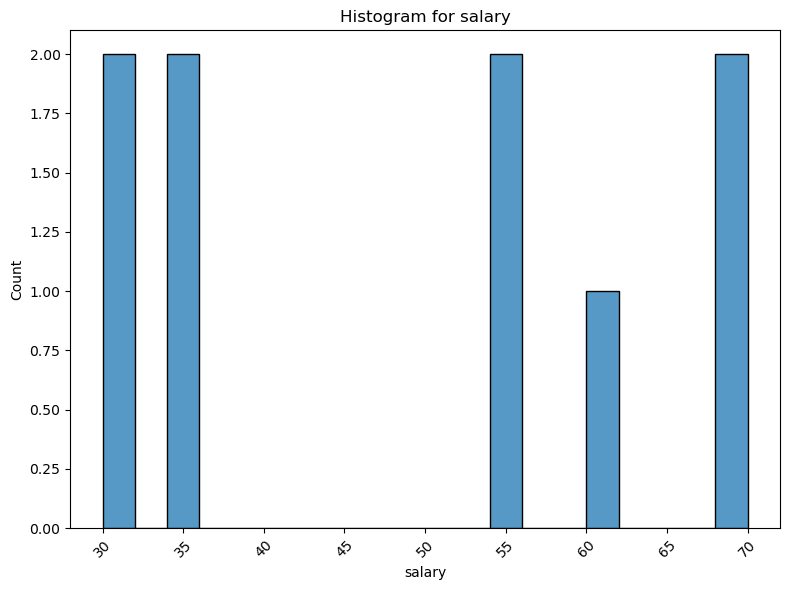

In [70]:
for column in num.columns:

    # Plot the crosstab result
    plt.figure(figsize=(8, 6))
    sns.histplot(num[column], bins=20, palette='viridis')
    plt.title(f'Histogram for {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

Description of the histograms:
2 employees have been working at the company for 8 years, three for two years and for 1,3,4 and 7 years it is only one employee each.
Two employees earn each 30, 35, 55 or 70 k per year. Only one employee earns 60 per year.

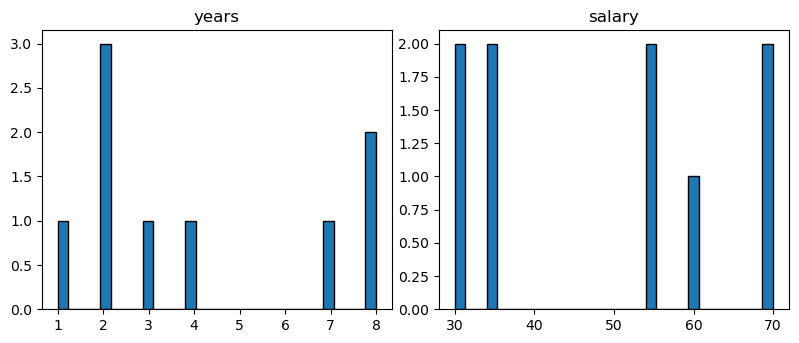

In [72]:
# grid size
nrows, ncols = 5, 5  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

#### What's the average salary in this company?

In [75]:
print(f" The average salary in this company is {employee["salary"].mean():.2f}")

 The average salary in this company is 48.89


#### What's the highest salary?

In [77]:
print(f" The highest salary in this company is {employee["salary"].max():.2f}")

 The highest salary in this company is 70.00


#### What's the lowest salary?

In [78]:
print(f" The lowest salary in this company is {employee["salary"].min():.2f}")

 The lowest salary in this company is 30.00


#### Who are the employees with the lowest salary?

In [80]:
low = employee["salary"].min()
lowest_employee = employee[employee["salary"] == low]

In [81]:
lowest_employee

,name,department,education,gender,title,years,salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [83]:
print(f" The employees with the lowest salary in this company are: {', '.join(map(str, lowest_employee['name'].to_list()))}")

 The employees with the lowest salary in this company are: Maria, David


#### Could you give all the information about an employee called David?

In [85]:
david =  employee[employee["name"] == 'David']
david

,name,department,education,gender,title,years,salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [88]:
', '.join(map(str,david["salary"].tolist()))

'30'

#### Print all the rows where job title is associate

In [91]:
associate =  employee[employee["title"] == 'associate']
print(associate.to_string(index=False, header=False))

Samuel Sales   Master M associate 3 55
   Eva Sales Bachelor F associate 2 55
 Pedro    IT      Phd M associate 7 60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [92]:
employee.head(3)

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [93]:
employee.iloc[:3]

,name,department,education,gender,title,years,salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [94]:
employee1 =  employee[(employee["title"] == 'associate') & (employee["salary"] > 55)]
employee1

,name,department,education,gender,title,years,salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [95]:
employee.groupby('years')['salary'].mean()

years
1    35.000000
2    38.333333
3    55.000000
4    35.000000
7    60.000000
8    70.000000
Name: salary, dtype: float64

####  What is the average Salary per title?

In [96]:
employee.groupby('title')['salary'].mean()

title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.

* Hint : Quantiles vs Quartiles*
In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

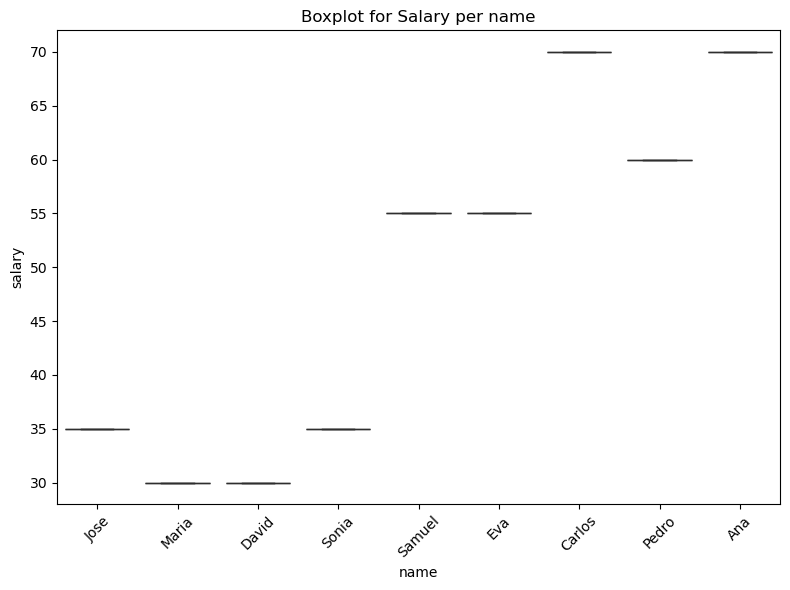

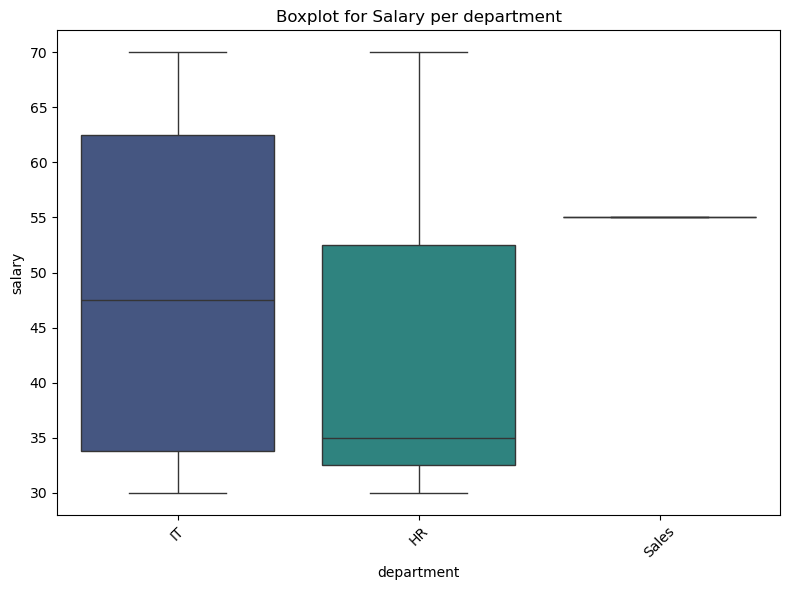

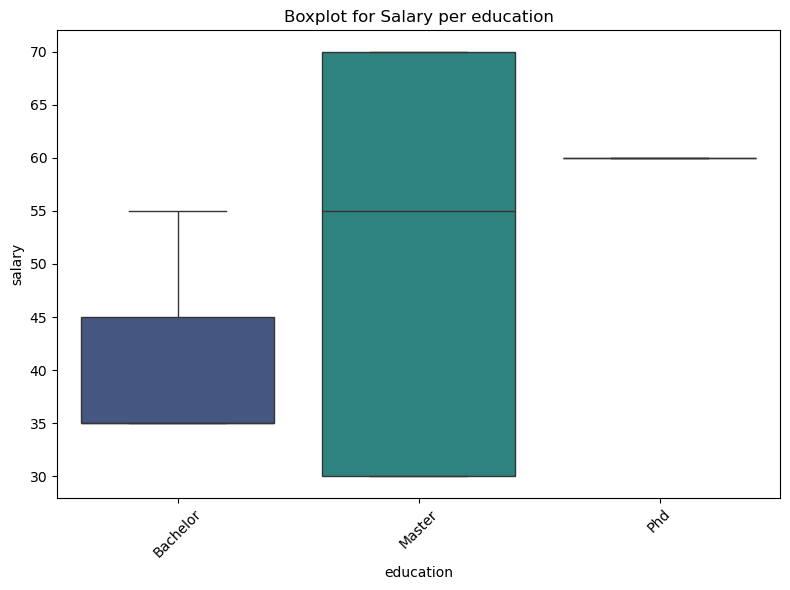

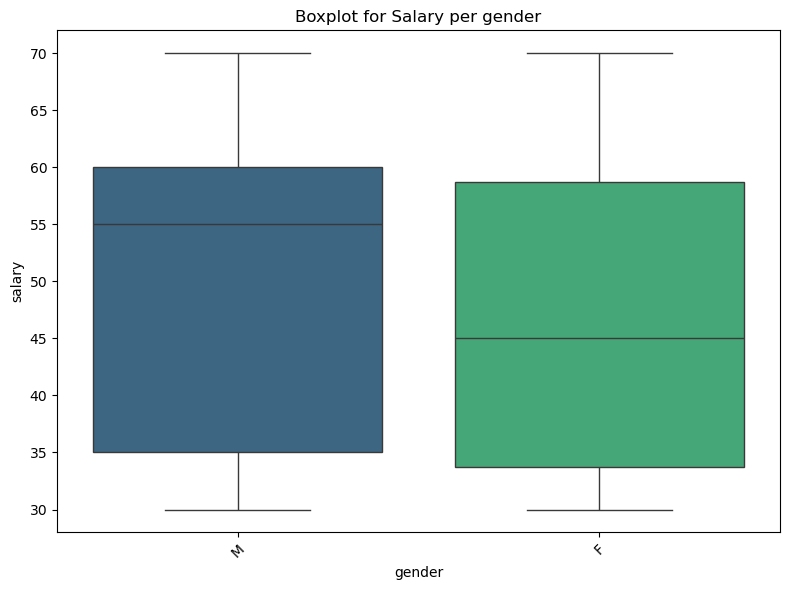

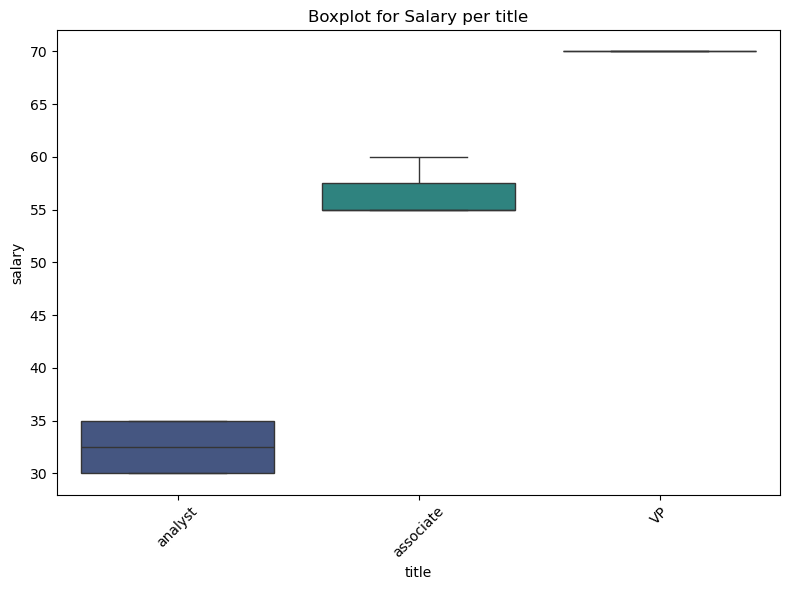

In [103]:
for column in cat.columns: 

    plt.figure(figsize=(8, 6))
    sns.boxplot(data=employee, x=column, y="salary", palette='viridis')
    plt.title(f'Boxplot for Salary per {column}')
    plt.xlabel(f'{column}')
    plt.ylabel('salary')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plot
plt.show()

In [105]:
employee['salary_4q'] = pd.qcut(employee['salary'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [106]:
# print first quartile here
q1 = employee[employee['salary_4q'] == 'Q1' ]
q1

,name,department,education,gender,title,years,salary,salary_4q
0,Jose,IT,Bachelor,M,analyst,1,35,Q1
1,Maria,IT,Master,F,analyst,2,30,Q1
2,David,HR,Master,M,analyst,2,30,Q1
3,Sonia,HR,Bachelor,F,analyst,4,35,Q1


In [107]:
# print third quartile here
q3 = employee[employee['salary_4q'] == 'Q3' ]
q3

,name,department,education,gender,title,years,salary,salary_4q
7,Pedro,IT,Phd,M,associate,7,60,Q3


#### Is the mean salary per gender different?

In [109]:
employee.groupby('gender')['salary'].mean()

gender
F    47.5
M    50.0
Name: salary, dtype: float64

Yes, actually men earn more money average wise.

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [111]:
num.describe().loc[['mean', 'min', 'max']].T

,mean,min,max
years,4.111111,1.0,8.0
salary,48.888889,30.0,70.0


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [114]:
department = employee.groupby("department")['salary'].agg(['min', 'max']).reset_index()
department

,department,min,max
0,HR,30,70
1,IT,30,70
2,Sales,55,55


In [124]:
# syntax for lambda difference = lambda min_salary, max_salary: max_salary - min_salary
department["difference"] = department.apply(lambda row: row['max'] - row['min'], axis=1 )
department

,department,min,max,difference
0,HR,30,70,40
1,IT,30,70,40
2,Sales,55,55,0


# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [ ]:
data_orders = pd.read_csv('Employee.csv')
orders = data_orders.copy()
orders.columns = [column.lower().replace(" ", "_") for column in orders.columns]

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [ ]:
# your answer here

In [ ]:
# your answer here

####  What is the average Purchase Price?

In [ ]:
# your answer here

#### What were the highest and lowest purchase prices? 

In [ ]:
# your answer here

In [ ]:
# your answer here

#### Select all the customers we have in Spain

In [45]:
# your answer here

#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [ ]:
# your answer here

#### Select all the customers who have bought more than 50 items ?

In [ ]:
# your answer here

#### Select orders from Spain that are above 50 items

In [ ]:
# your answer here

#### Select all free orders

In [ ]:
# your answer here

#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [ ]:
# your answer here

#### Select all orders that are made in 2011 and are 'lunch bag'  

In [ ]:
# your answer here

#### Show the frequency distribution of the amount spent in Spain.

In [ ]:
# your answer here

#### Select all orders made in the month of August

In [ ]:
# your answer here

#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [ ]:
# your answer here

#### What's the  average amount of money spent by country

In [ ]:
# your answer here

#### What's the most expensive item?

In [ ]:
# your answer here

#### What was the average amount spent per year ?

In [ ]:
# your answer here